In [1]:

from PollenDataAnalyzer import PollenDataAnalyzer
# %pip install tqdm
from collections import defaultdict

In [ ]:

# structures: 
# 1) df-> clean data-> 
# 2) pollen only() [using self.df to process the functions store in pollen_df] -> 
# 3) lat_long_to_county() [using pollen_df to to process the function and store in fips_df]   ->
# 4) add_land_cover_info() [using fips_df to to process the function and then store it in final_df] -> 
# 5) split_observation_date() [using final_df to process the function and then store it in final_df] 



In [3]:
LOCAL_PATH = "/Applications/Home/2025 Spring/GEOG398E/Project data/dataset-for-roi-2/"

In [ ]:
import pandas as pd

# path to your CSV file
file_path = LOCAL_PATH + "status_intensity_observation_data.csv"

# read the CSV
df = pd.read_csv(file_path)

#checking for all the phenophase descriptions even before processing 
print(df["Phenophase_Description"].unique())

['Open flowers (lilac)' 'Full flowering (lilac)'
 'End of flowering (lilac/honeysuckle)'
 'Breaking leaf buds (lilac/honeysuckle)'
 'All leaf buds broken (lilac/honeysuckle)'
 '>=50% of leaves colored (deciduous)' 'All leaves colored (deciduous)'
 '>=50% of leaves fallen (deciduous)' 'All leaves fallen (deciduous)'
 'Full flowering (50%)' 'Breaking leaf buds' 'Leaves' 'Open flowers'
 'All leaves withered (herbaceous and grasses)'
 'Open flowers (1 location)' 'Ripe fruits (1 location)'
 'Initial growth (forbs)' 'Leaves (forbs)' 'Ripe fruits'
 'Increasing leaf size' 'Falling leaves' 'Colored leaves'
 'Flowers or flower buds' 'Recent fruit or seed drop' 'Fruits'
 'Pollen release (flowers)' '>=75% of full leaf size (deciduous)'
 'Unripe seed cones' 'Ripe seed cones' 'Young needles (pines)'
 'Pollen cones (conifers)' 'Recent cone or seed drop'
 'Open pollen cones (conifers)' 'Emerging needles (pines)'
 'Pollen release (conifers)' 'Breaking needle buds (conifers)'
 'Young needles (conifers)'

In [5]:
#!!!download and Change the data_path for your own "dataset-for-roi/cleaned_status_intensity_observation_data.csv" path on your local computer
#also download and change the land_cover_path

analyzer = PollenDataAnalyzer(
    data_path= LOCAL_PATH + "status_intensity_observation_data.csv",  # or the raw CSV
    mapping_path="../intensity_mapping.json",
    Phenophase_path="../Phenophase.json", 
    land_cover_path = LOCAL_PATH + "table_2021_counties_max.csv",
    project_data_path = LOCAL_PATH
)

Data cleaned with numerical (1-10) intensity mapping.
Intensity value distribution:
Intensity_Value
0.0    23547
1.0    25202
2.0    19490
3.0    16287
4.0    18917
5.0    17476
6.0    11193
7.0    27018
8.0     3492
9.0    71646
Name: count, dtype: int64


In [39]:
# analyzer.map_phenophase_categories()
analyzer.pollen_only()


/Applications/Home/2025 Spring/GEOG398E/geog398e-project/scripts/PollenDataAnalyzer.py:194: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = self.df['Phenophase_Description'].str.contains(combined_pattern, regex=True, na=False)


Pollen-only dataset created with 32196 rows.
Original dataset has 32196 rows.
Unique phenophase descriptions in pollen dataset:
['Flowers or flower buds' 'Open flowers' 'Pollen release (flowers)'
 'Pollen cones (conifers)' 'Open pollen cones (conifers)'
 'Pollen release (conifers)' 'Open flowers (grasses/sedges)']


In [ ]:
#using the pollen_df to convert only the correct phenophase data with corresponding lag_long to county ideas
#https://geo.fcc.gov/api/census/#!/area/get_area
#this will take 1-3 minutues max (with multithreading)
#now this will take 20 second max (with cache using hash maps)
analyzer.lat_long_to_county()


Fetching county FIPS codes...


Fetching FIPS: 100%|████████████████████████████████████████| 32196/32196 [00:14<00:00, 2238.76it/s]


Finished fetching county FIPS codes.
         Observation_ID   Latitude  Longitude  Species_ID  Individual_ID  \
1266            7674014  35.648930 -78.816948          82           6552   
1279            9894514  35.648930 -78.816948          82           6552   
1280            9959272  35.648930 -78.816948          82           6552   
1281           10053832  35.648930 -78.816948          82           6552   
1282           10705250  35.648930 -78.816948          82           6552   
...                 ...        ...        ...         ...            ...   
1670447        52064280  39.033443 -77.018204        1201         347548   
1671483        51959969  35.167660 -81.056870        1201         350442   
1671520        52067610  39.009678 -77.095146        1728         351069   
1671614        52137296  38.883358 -77.106964        1653         364153   
1671615        52137297  38.883358 -77.106964        1653         364153   

         Phenophase_ID Phenophase_Category  Phenop

array(['Flowers or flower buds', 'Open flowers',
       'Pollen release (flowers)', 'Pollen cones (conifers)',
       'Open pollen cones (conifers)', 'Pollen release (conifers)',
       'Open flowers (grasses/sedges)'], dtype=object)

In [8]:
analyzer.add_land_cover_info()

Land cover types added using hash table.
     county_fips        land_cover_type
1266       37183  Developed, open space
1279       37183  Developed, open space
1280       37183  Developed, open space
1281       37183  Developed, open space
1282       37183  Developed, open space


In [ ]:
# finding the number of data points for each year
year_counts = defaultdict(int)

# Loop through each date and extract the year
for date in analyzer.df["Observation_Date"]:
    year = str(date)[:4]  # Get the year part from YYYY-MM-DD
    year_counts[year] += 1

# Sort by year
sorted_years = sorted(year_counts.items())

# Print as a clean table
print(f"{'Year':<10} {'Count':<10}")
print("-" * 20)
for year, count in sorted_years:
    print(f"{year:<10} {count:<10}")

#check if it match with Pollen-only dataset created with 31935 rows. it does!
print("final data sets", len(analyzer.df), "rows.") 
print(len(analyzer.final_df))


Year       Count     
--------------------
2011       1         
2012       41        
2013       851       
2014       958       
2015       782       
2016       1717      
2017       2270      
2018       2287      
2019       2211      
2020       1701      
2021       3256      
2022       5019      
2023       5738      
2024       3659      
2025       1705      
final data sets 32196 rows.
32196


In [10]:
analyzer.split_observation_date()

Splitting Observation_Date: 100%|██████████| 32196/32196 [00:00<00:00, 507271.80it/s]


Updated final_df with Year, Month, Day columns and saved to /Applications/Home/2025 Spring/GEOG398E/Project data/dataset-for-roi-2/final_df.csv


In [ ]:
#finalizing the clean data with last dropped values/rows
import numpy as np
# print(analyzer.final_df.columns) //checking all the columns

# Define the exact columns you want to keep
columns_to_keep = [
    'Observation_ID', 'Species_ID', 'Phenophase_ID', 'Phenophase_Category',
    'Phenophase_Description', 'Phenophase_Definition_ID',
    'Day_of_Year', 'Intensity_Category_ID', 'Intensity_Value', 'Site_Visit_ID',
    'AGDD', 'Tmax', 'Tmin', 'Prcp', 'Accum_Prcp', 'Daylength',
    'county_fips', 'land_cover_type', 'Observation_Date', 'Year', 'Month', 'Day'
]

# Select only these columns
cleaned_df = analyzer.final_df[columns_to_keep]

# Drop rows with NA or empty Intensity_Value
cleaned_df = cleaned_df.dropna(subset=['Intensity_Value'])
cleaned_df = cleaned_df[cleaned_df['Intensity_Value'].astype(str).str.strip() != '']
print("Starting row:", len(cleaned_df))


# Define climate columns with -9999 values
# Convert -9999 to NaN for these columns
# Drop rows where any climate column has NaN (original -9999 values)
climate_columns = ['AGDD', 'Tmax', 'Tmin', 'Prcp', 'Accum_Prcp', 'Daylength']
cleaned_df[climate_columns] = cleaned_df[climate_columns].replace(-9999, np.nan)
cleaned_df = cleaned_df.dropna(subset=climate_columns)

# cleaning steps 
cleaned_df = cleaned_df.dropna(subset=['Intensity_Value'])
cleaned_df = cleaned_df[cleaned_df['Intensity_Value'].astype(str).str.strip() != '']

# Verify removal
print("Remaining rows:", len(cleaned_df))
print("Missing values check:")
print(cleaned_df[climate_columns].isna().sum())

# Save the cleaned DataFrame
cleaned_df.to_csv(
    LOCAL_PATH + "cleaned_V2.0_status_intensity_observation_data.csv",
    index=False
)


# print(cleaned_df.columns) # Print final columns


# finding the number of data points for each year
# Loop through each date and extract the year
year_counts = defaultdict(int)

for date in cleaned_df["Observation_Date"]:
    year = str(date)[:4]  # Get the year part from YYYY-MM-DD
    year_counts[year] += 1

# Sort by year
sorted_years = sorted(year_counts.items())

# Print as a clean table
print(f"{'Year':<10} {'Count':<10}")
print("-" * 20)
for year, count in sorted_years:
    print(f"{year:<10} {count:<10}")

print("final columns:", cleaned_df.columns.tolist())


Starting row: 32196
Remaining rows: 26832
Missing values check:
AGDD          0
Tmax          0
Tmin          0
Prcp          0
Accum_Prcp    0
Daylength     0
dtype: int64
Year       Count     
--------------------
2011       1         
2012       41        
2013       851       
2014       958       
2015       782       
2016       1717      
2017       2270      
2018       2287      
2019       2211      
2020       1701      
2021       3256      
2022       5019      
2023       5738      
final columns: ['Observation_ID', 'Species_ID', 'Phenophase_ID', 'Phenophase_Category', 'Phenophase_Description', 'Phenophase_Definition_ID', 'Day_of_Year', 'Intensity_Category_ID', 'Intensity_Value', 'Site_Visit_ID', 'AGDD', 'Tmax', 'Tmin', 'Prcp', 'Accum_Prcp', 'Daylength', 'county_fips', 'land_cover_type', 'Observation_Date', 'Year', 'Month', 'Day']


In [37]:
#figuring out how to categorize
# For numerical features
print(cleaned_df[['AGDD', 'Daylength', 'Prcp', 'Tmax', 'Tmin', 'Accum_Prcp']].describe())

# For categorical features
print(cleaned_df['land_cover_type'].value_counts())
print(cleaned_df['Phenophase_Description'].value_counts())
print(cleaned_df['Species_ID'].value_counts())

               AGDD     Daylength          Prcp          Tmax          Tmin  \
count  26832.000000  26832.000000  26832.000000  26832.000000  26832.000000   
mean    1217.358043  45817.427624      3.017192     20.990165      7.911884   
std     1170.437991   4249.064734      7.526812      6.290412      6.574282   
min        9.030000  33458.000000      0.000000     -2.000000    -11.000000   
25%      525.250000  43064.750000      0.000000     17.000000      3.000000   
50%      808.370000  45960.000000      0.000000     21.210000      8.000000   
75%     1252.290000  49370.250000      1.890000     25.800000     12.010000   
max     6969.560000  53234.000000     97.000000     37.200000     25.830000   

         Accum_Prcp  
count  26832.000000  
mean     475.254810  
std      294.562752  
min        0.000000  
25%      257.000000  
50%      380.800000  
75%      655.470000  
max     1880.000000  
land_cover_type
Deciduous forest            18154
Developed, open space        3651
Cultiv

In [ ]:


# cleaned_df["Species_ID"].unique()
# analyzer.pollen_df["Phenophase_Description"].unique()


# print(len(cleaned_df["Accum_Prcp"].unique()))
# print(len(cleaned_df["Prcp"].unique()))

# cleaned_df["Accum_Prcp"].unique()
print(cleaned_df["Phenophase_Description"].unique())
# Phenophase_Description
#final data sets 32196 rows.
print(cleaned_df.shape[0])
# print(cleaned_df.columns) but only using the column below--> 

# [['AGDD', 'Daylength', 'Prcp', 'Tmax', 'Tmin', 'Year', 'Month', 'Day', 'Accum_Prcp', 'Species_ID', ]]
# print("AGDD:", cleaned_df["AGDD"].unique(), "len:", len(cleaned_df["AGDD"].unique()))
# print("Daylength:", cleaned_df["Daylength"].unique(), "len:", len(cleaned_df["Daylength"].unique()))
# print("Prcp:", cleaned_df["Prcp"].unique(), "len:", len(cleaned_df["Prcp"].unique()))
# print("Tmax:", cleaned_df["Tmax"].unique(), "len:", len(cleaned_df["Tmax"].unique()))
# print("Tmin:", cleaned_df["Tmin"].unique(), "len:", len(cleaned_df["Tmin"].unique()))
# print("Year:", cleaned_df["Year"].unique(), "len:", len(cleaned_df["Year"].unique()))
# print("Month:", cleaned_df["Month"].unique(), "len:", len(cleaned_df["Month"].unique()))
# print("Day:", cleaned_df["Day"].unique(), "len:", len(cleaned_df["Day"].unique()))
# print("Accum_Prcp:", cleaned_df["Accum_Prcp"].unique(), "len:", len(cleaned_df["Accum_Prcp"].unique()))
# print("Species_ID:", cleaned_df["Species_ID"].unique(), "len:", len(cleaned_df["Species_ID"].unique()))
# print("land_cover_type:", cleaned_df["land_cover_type"].unique(), "len:", len(cleaned_df["land_cover_type"].unique()))
# print("Phenophase_Description:", cleaned_df["Phenophase_Description"].unique(), "len:", len(cleaned_df["Phenophase_Description"].unique()))
# cleaned_df["Daylength"].unique()




['Flowers or flower buds' 'Open flowers' 'Pollen release (flowers)'
 'Pollen cones (conifers)' 'Open pollen cones (conifers)'
 'Pollen release (conifers)' 'Open flowers (grasses/sedges)']
32196


In [ ]:
##making visualization for version 1 data for presentations purposes 

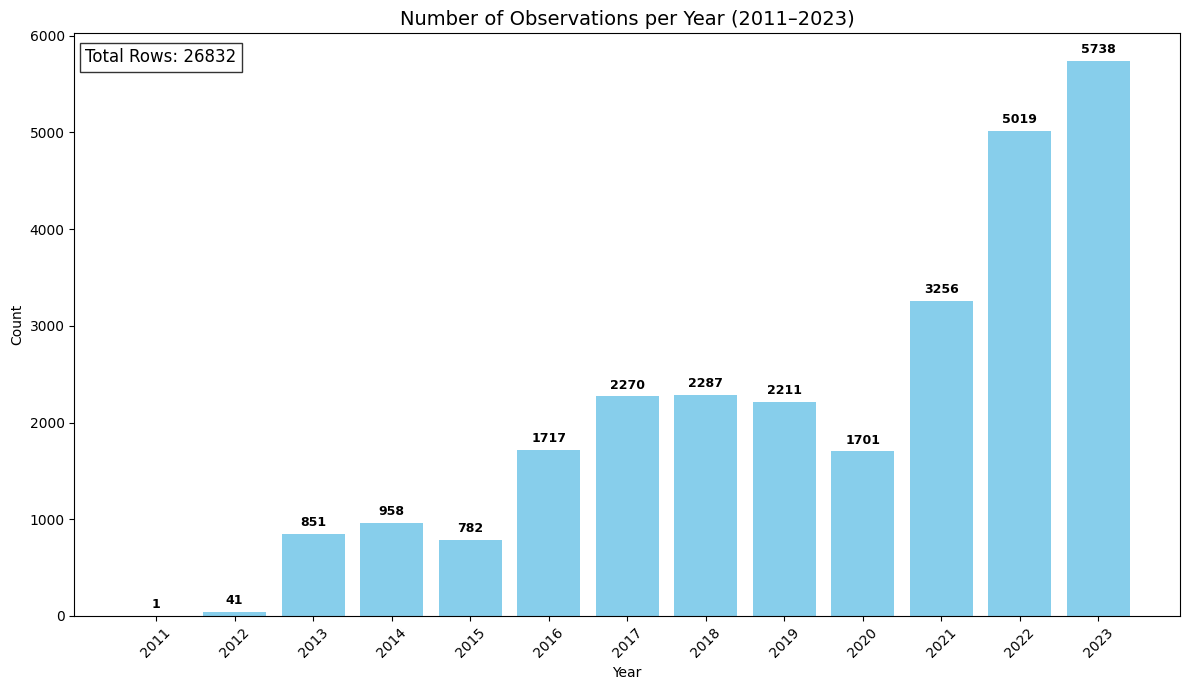

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV
file_path = '/Applications/Home/2025 Spring/GEOG398E/Project data/cleaned_V1.0.csv'
df = pd.read_csv(file_path)

# Count records per year
year_counts = defaultdict(int)
for date in df["Observation_Date"]:
    year = str(date)[:4]
    year_counts[year] += 1

# Convert to sorted list and filter to 2011–2023
sorted_years = sorted((int(year), count) for year, count in year_counts.items())
filtered_years = [(year, count) for year, count in sorted_years if 2011 <= year <= 2023]

# Separate into two lists for plotting
years = [year for year, _ in filtered_years]
counts = [count for _, count in filtered_years]

# Total count across the filtered years
total_count = sum(counts)

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.bar(years, counts, color='skyblue')

# Add count labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, str(count),
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Title and labels
plt.title('Number of Observations per Year (2011–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(years, rotation=45)

# Add total count as a text box in the upper left
plt.text(0.01, 0.95, f'Total Rows: {total_count}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [8]:
# print(df.columns.tolist())

print(len(df["land_cover_type"].unique()))
df["land_cover_type"].unique()

8


array(['Developed, open space', 'Deciduous forest',
       'Developed, low intensity', 'Pasture/hay', 'Cultivated crops',
       'Evergreen forest', 'Mixed forest', 'Woody wetlands'], dtype=object)

In [ ]:

from PollenDataAnalyzer import PollenDataAnalyzer
LOCAL_PATH = "/Applications/Home/2025 Spring/GEOG398E/Project data/dataset-for-roi-2/"

analyzer2 = PollenDataAnalyzer(
    data_path= '/Applications/Home/2025 Spring/GEOG398E/Project data/cleaned_V1.0.csv',  # or the raw CSV
    mapping_path="../intensity_mapping.json",
    Phenophase_path="../Phenophase.json", 
    land_cover_path = LOCAL_PATH + "table_2021_counties_max.csv",
    project_data_path = LOCAL_PATH
)





Data cleaned with numerical (1-10) intensity mapping.
Intensity value distribution:
Intensity_Value
high    17215
low     14981
Name: count, dtype: int64


In [5]:
analyzer2.plot_intensity_by_year

<bound method PollenDataAnalyzer.plot_intensity_by_year of <PollenDataAnalyzer.PollenDataAnalyzer object at 0x11b631630>>

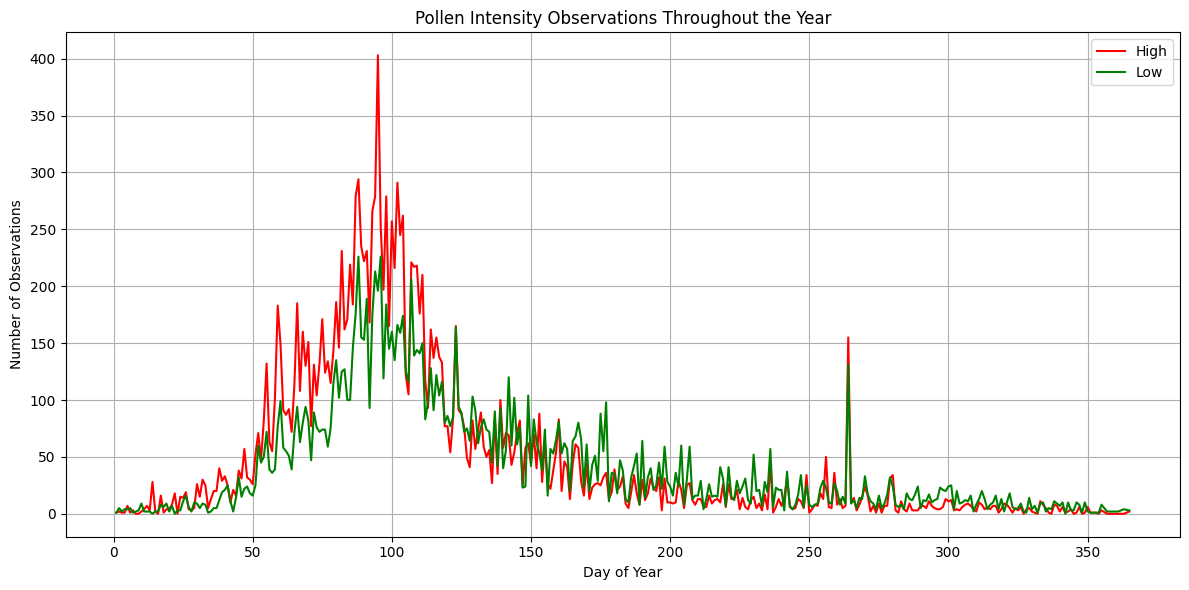

'\nPlots the raw counts of high and low intensity observations for each day of the year.\n'

In [14]:
analyzer2.plot_intensity_counts()
"""
Plots the raw counts of high and low intensity observations for each day of the year.
"""

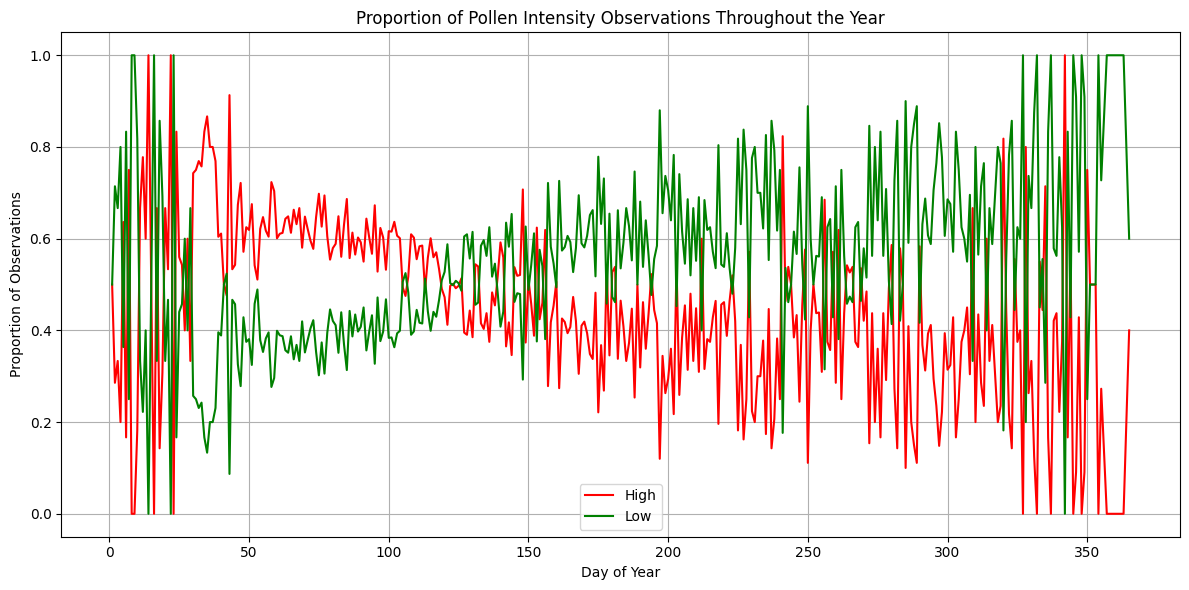

In [11]:
analyzer2.plot_normalized_intensity()
# """
# Plots the proportion of high and low intensity observations for each day of the year.
# """

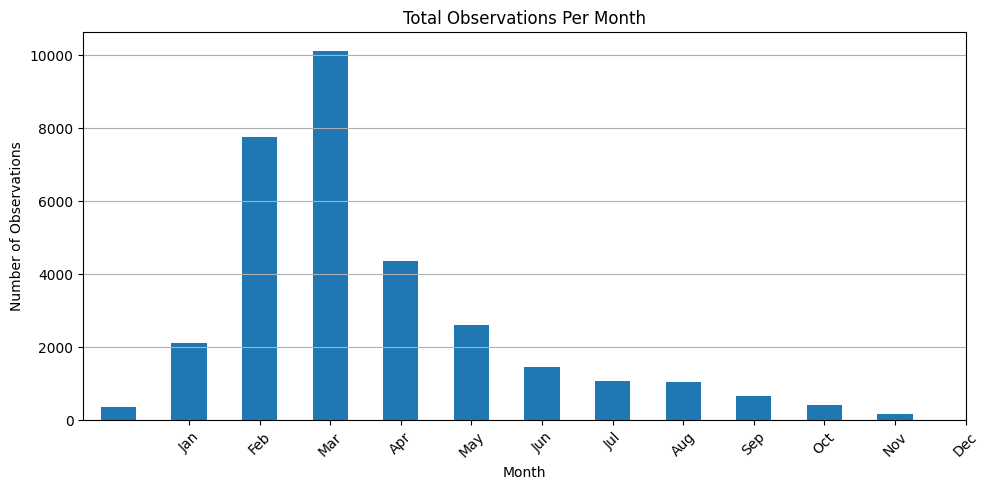

In [12]:
analyzer2.plot_monthly_observations()
#  """
#  Plots the total number of observations for each month as a bar chart.
# """

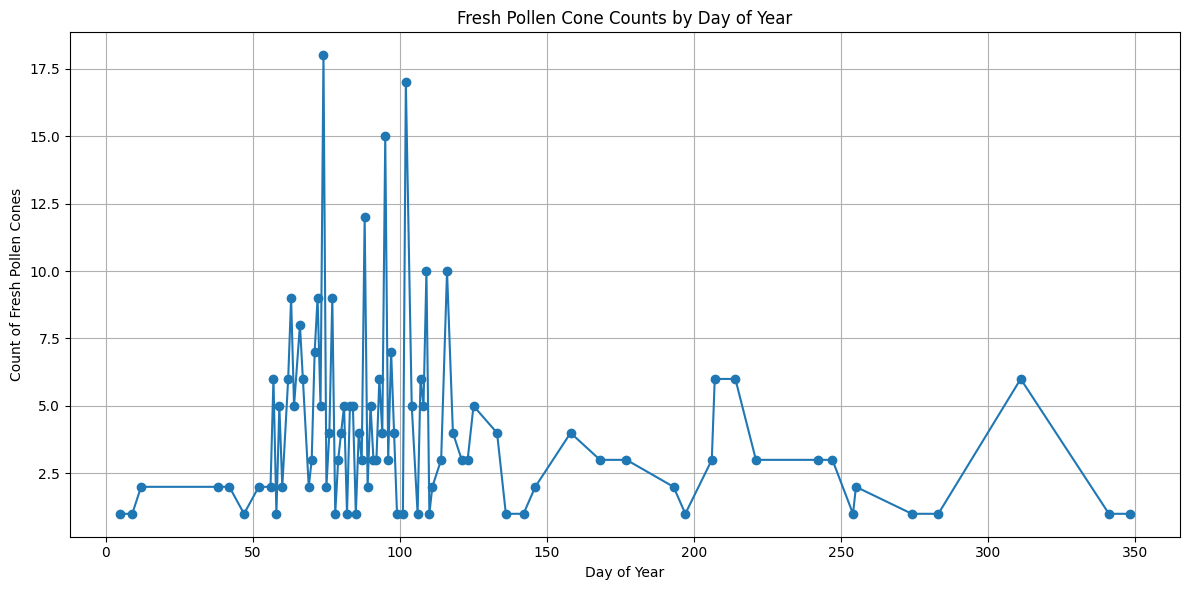

In [13]:
analyzer2.plot_pollen_cone_counts()
  # """
  # Plots counts of fresh pollen cones by day of year.
  # Handles descriptions like 'Pollen cones (conifers)'.
  # """